# Cargar librerias

In [1]:
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO

from google.colab import drive

# Montar drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Cargar dataset

In [3]:
df_original = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial I/Proyecto/filtered_bags_women.csv")
df = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial I/Proyecto/histogram_features_HSV.csv")
df_rp = df[(df['color'] == 'Red') | (df['color'] == 'Purple')]
df

,id,color,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95
0,793,Green,0.930296,0.000000,0.000482,0.001447,0.000965,0.082950,0.002894,0.000965,...,0.000972,0.000324,0.000000,0.001621,0.001945,0.001945,0.001621,0.002593,0.001945,0.996134
1,511,Green,0.000433,0.009517,0.089979,0.860425,0.125019,0.156598,0.453356,0.076136,...,0.094076,0.042486,0.216678,0.450958,0.677954,0.480091,0.042486,0.004249,0.003035,0.000000
2,56,Green,0.901341,0.000000,0.000000,0.002926,0.001672,0.345737,0.240804,0.035535,...,0.002951,0.002361,0.001476,0.000000,0.000590,0.000295,0.000000,0.000000,0.004722,0.996998
3,500,Green,0.763193,0.001155,0.000000,0.004044,0.000000,0.107459,0.004622,0.002889,...,0.000360,0.001798,0.000719,0.001079,0.000719,0.000719,0.001798,0.005393,0.011146,0.988420
4,1187,Green,0.872676,0.027331,0.061653,0.027331,0.036229,0.178603,0.047034,0.024788,...,0.012532,0.008467,0.012193,0.012870,0.016257,0.009145,0.009483,0.007451,0.007451,0.996783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1552,Beige,0.907164,0.034928,0.045454,0.311000,0.104783,0.181816,0.004785,0.000957,...,0.005835,0.010050,0.013292,0.026583,0.037606,0.048952,0.054788,0.029177,0.008429,0.995255
1346,209,Beige,0.885760,0.002648,0.035748,0.403381,0.053402,0.161529,0.005737,0.000883,...,0.001900,0.000317,0.000633,0.001267,0.001584,0.000317,0.000950,0.001900,0.002851,0.994546
1347,1621,Beige,0.622562,0.255148,0.584140,0.062436,0.117668,0.297173,0.008405,0.001801,...,0.023240,0.038257,0.050771,0.081520,0.065073,0.060782,0.056492,0.019307,0.006078,0.988248
1348,1432,Beige,0.000497,0.003478,0.194263,0.619058,0.316485,0.663773,0.192772,0.032294,...,0.019284,0.032141,0.267644,0.522431,0.619437,0.445293,0.245437,0.091162,0.046750,0.024544


# Funciones utiles

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO

def ver_imagen(df, id, original=False):
  color = df["baseColour"][id]
  local_path = f"/content/drive/MyDrive/Inteligencia Artificial I/Proyecto/Imagenes_bolsos/{color}/{id}.jpg"
  img_path = df["image"][id] if original else local_path

  print("Ruta usada:", img_path)

  # Si la ruta es una URL externa
  if str(img_path).startswith("http"):
      response = requests.get(img_path)
      img = Image.open(BytesIO(response.content))
      plt.imshow(img)
  else:
      img = mpimg.imread(img_path)
      plt.imshow(img)

  plt.axis("off")
  plt.show()

#ver_imagen(df_original, 1161, original=True)

def ver_matriz_confusion(y_test, y_pred, encoder):
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=encoder.classes_,
              yticklabels=encoder.classes_)
  plt.xlabel("Predicción")
  plt.ylabel("Etiqueta real")
  plt.title("Matriz de confusión")
  plt.show()

# Grupos por color

In [5]:
df.groupby("color")["color"].count()

,color
color,
Beige,87
Black,315
Blue,115
Brown,295
Green,87
Grey,83
Pink,92
Purple,105
Red,105


# Gaussian Naive Bayes(Para dos características)

---



In [6]:
# Filtrar solo los colores Red y Purple
df_rp = df[(df['color'] == 'Red') | (df['color'] == 'Purple')].copy()

# Convertir colores a valores numéricos
df_rp["color"] = pd.factorize(df_rp["color"])[0]

# Separar características (X) y etiquetas (Y)
X = df_rp.iloc[:, 2:]  # todas las columnas de features
Y = df_rp["color"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# Crear y entrenar modelo
est = GaussianNB()
est.fit(X_train, y_train)

# Predicciones
predictions = est.predict(X_test)

# Evaluar
print("Matriz de confusión:\n", confusion_matrix(y_test, predictions))
print("\nReporte de clasificación:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))




Matriz de confusión:
 [[20  0]
 [ 2 20]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.91      0.95        22

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.96      0.95      0.95        42

Accuracy: 0.9523809523809523


[0]
Ruta usada: /content/drive/MyDrive/Inteligencia Artificial I/Proyecto/Imagenes_bolsos/Beige/1375.jpg


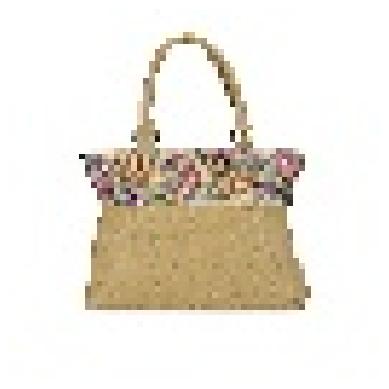

In [ ]:
X = df[df['id'] == 1375]
print(est.predict(X.iloc[:, 2:]))
ver_imagen(df_original, 1375)

# Gaussian Naive Bayes(Para todas las características)

# SVM (Para todas las características)

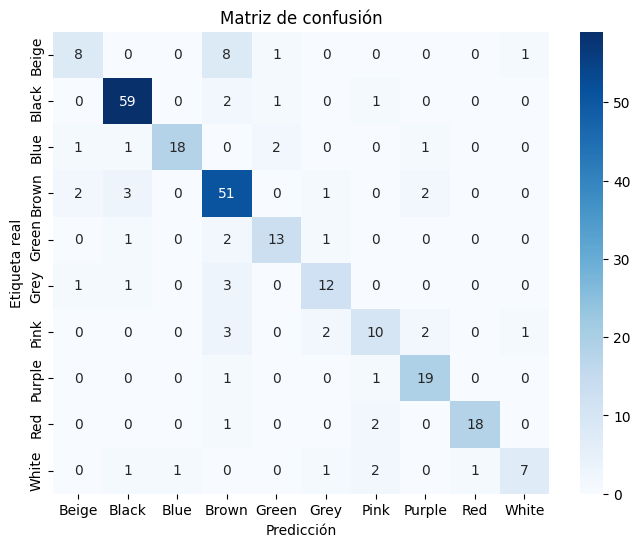

Accuracy(train): 0.9333333333333333

Reporte de clasificación(train):
               precision    recall  f1-score   support

       Beige       0.94      0.84      0.89        69
       Black       0.94      0.97      0.95       252
        Blue       0.97      0.92      0.94        92
       Brown       0.87      0.97      0.92       236
       Green       0.99      0.94      0.96        70
        Grey       0.90      0.80      0.85        66
        Pink       0.96      0.91      0.93        74
      Purple       0.99      0.92      0.95        84
         Red       0.94      0.96      0.95        84
       White       0.98      0.92      0.95        53

    accuracy                           0.93      1080
   macro avg       0.95      0.92      0.93      1080
weighted avg       0.94      0.93      0.93      1080

Accuracy(test): 0.7962962962962963

Reporte de clasificación(Test):
               precision    recall  f1-score   support

       Beige       0.67      0.44      0.53   

In [72]:
#Cargar dataset
df = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial I/Proyecto/histogram_features_HSV.csv")

# Separar X y
ids = df["id"]
X = df.drop(columns=["id", "color"])
Y = df["color"]

#Codificar las clases como números
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(Y)

x_train, x_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y_encoded, ids,test_size=0.2, random_state=42, stratify=y_encoded)

# Entrenar modelo

est = SVC(kernel='poly', C=100, degree=4) #(kernel='rbf', C= 10, gamma='scale')
est.fit(x_train, y_train)

predictions_train = est.predict(x_train)
predictions = est.predict(x_test)

ver_matriz_confusion(y_test, predictions, encoder)

print("Accuracy(train):", accuracy_score(y_train, predictions_train))
print("\nReporte de clasificación(train):\n", classification_report(y_train, predictions_train, target_names=encoder.classes_))

print("Accuracy(test):", accuracy_score(y_test, predictions))
print("\nReporte de clasificación(Test):\n", classification_report(y_test, predictions, target_names=encoder.classes_))

## Analisis de la matriz de confusión

El modelo parece funcionar muy bien para los colores oscuros y bien definidos como Black, Brown y Purple, donde los valores en la diagonal son mucho más grandes.

Hay más confusiones entre colores similares:

Beige y Brown (ambos tonos tierra).

Pink, Purple y Red (tonos rojizos).

Grey y Green también presentan algo de mezcla.

Esto tiene sentido, porque en el espacio de color HSV los colores similares tienen histogramas muy parecidos.


## Analisis reporte de clasificación
Precision promedio (0.79):
En promedio, el modelo acierta el 79% de las veces cuando predice un color.
Es decir, cuando dice “este bolso es de color X”, suele tener razón.

Recall promedio (0.71):
En promedio, el modelo detecta el 71% de los bolsos que realmente son de cada color.
Es decir, se le escapan algunos casos verdaderos, especialmente en colores similares

# Analizando el modelo con validación cruzada


In [61]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# === Modelo base ===
est = SVC(kernel='poly', C=100, degree=4)

# === Evaluación en entrenamiento con validación cruzada ===
# (usamos 5 folds para consistencia con la curva de aprendizaje)
cv_scores_recall = cross_val_score(est, X, Y, cv=5, scoring='recall_macro')
cv_scores_precision = cross_val_score(est, X, Y, cv=5, scoring='precision_macro')

print("Resultados en entrenamiento (validación cruzada):")
print(f"Recall promedio (CV): {np.mean(cv_scores_recall):.4f} ± {np.std(cv_scores_recall):.4f}")
print(f"Precisión promedio (CV): {np.mean(cv_scores_precision):.4f} ± {np.std(cv_scores_precision):.4f}")

# === Entrenar el modelo final con TODO el train ===
est.fit(X, Y)

# === Evaluar en test ===
y_pred_test = est.predict(X)

print("\nResultados en test:")
print(f"Accuracy: {accuracy_score(Y, y_pred_test):.4f}")

print("\nReporte de clasificación en test:\n")
print(classification_report(Y, y_pred_test, target_names=encoder.classes_))


Resultados en entrenamiento (validación cruzada):
Recall promedio (CV): 0.7290 ± 0.0141
Precisión promedio (CV): 0.7665 ± 0.0120

Resultados en test:
Accuracy: 0.9326

Reporte de clasificación en test:

              precision    recall  f1-score   support

       Beige       0.95      0.82      0.88        87
       Black       0.94      0.97      0.95       315
        Blue       0.96      0.92      0.94       115
       Brown       0.87      0.96      0.91       295
       Green       0.99      0.94      0.96        87
        Grey       0.91      0.81      0.85        83
        Pink       0.97      0.93      0.95        92
      Purple       0.97      0.92      0.95       105
         Red       0.96      0.96      0.96       105
       White       0.98      0.91      0.94        66

    accuracy                           0.93      1350
   macro avg       0.95      0.91      0.93      1350
weighted avg       0.93      0.93      0.93      1350



# Prueba del clasificador

[883, 276, 238, 501, 338, 1212, 629, 1009, 330, 513, 92, 499, 122, 1444, 1364, 574, 1014, 718, 1248, 765, 362, 663, 1352, 1055, 1466, 169, 667, 95, 1625, 1411, 1366, 1454, 1058, 608, 526, 445, 823, 945, 793, 13, 1557, 1431, 1132, 834, 1485, 726, 940, 1305, 82, 274, 474, 1001, 1182, 1561, 1243, 615, 1385, 1282, 1116, 1250, 422, 596, 10, 1279, 400, 1415, 1615, 132, 506, 228, 1552, 1344, 1623, 642, 339, 618, 1652, 412, 1146, 1566, 100, 383, 785, 1455, 139, 447, 204, 572, 1106, 1359, 1495, 1155, 1057, 187, 1242, 1429, 479, 72, 544, 808, 860, 923, 643, 1604, 1441, 512, 852, 772, 256, 599, 733, 1174, 1298, 982, 734, 131, 1187, 401, 1617, 198, 375, 549, 379, 1070, 836, 976, 1384, 1286, 1168, 576, 1232, 414, 502, 1427, 552, 371, 759, 393, 308, 723, 556, 128, 797, 137, 1197, 303, 1323, 1013, 373, 145, 534, 1605, 777, 1402, 784, 1556, 471, 1328, 1245, 1586, 151, 212, 1271, 1304, 1399, 1083, 1136, 652, 1140, 1318, 616, 1645, 937, 767, 1151, 1564, 272, 210, 1127, 1060, 1575, 467, 163, 913, 1403, 1

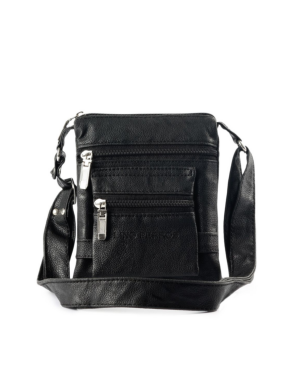

In [8]:
#est.predict()
print([id for id in ids_test])
id = 92
x = df[df["id"] == id].iloc[:, 2:]
print("Clase predecida:",encoder.classes_[est.predict(x)])
print("Clase original:", df_original[df_original["id"] == id]["baseColour"])
ver_imagen(df_original, id, original=True)

# Busqueda de hiperparametros

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir el modelo base
svc = SVC()

# Definir la cuadrícula de hiperparámetros
param_grid = {
  'kernel': ['linear', 'poly', 'rbf'],
  'C': [0.1, 1, 10, 100],
  'gamma': ['scale', 'auto', 0.01, 0.1, 1],
  'degree': [2, 3, 4]
}

# Configurar el GridSearch con validación cruzada
grid = GridSearchCV(
    svc,
    param_grid,
    cv=5,
    scoring='recall_macro',
    verbose=2,
    n_jobs=-1
)

# Entrenar
grid.fit(x_train, y_train)

# Mostrar el mejor resultado
print("Mejores hiperparámetros encontrados:")
print(grid.best_params_)
print("Mejor recall promedio:", grid.best_score_)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Mejores hiperparámetros encontrados:
{'C': 100, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Mejor recall promedio: 0.7240951935975815


# Curva de aprendizaje

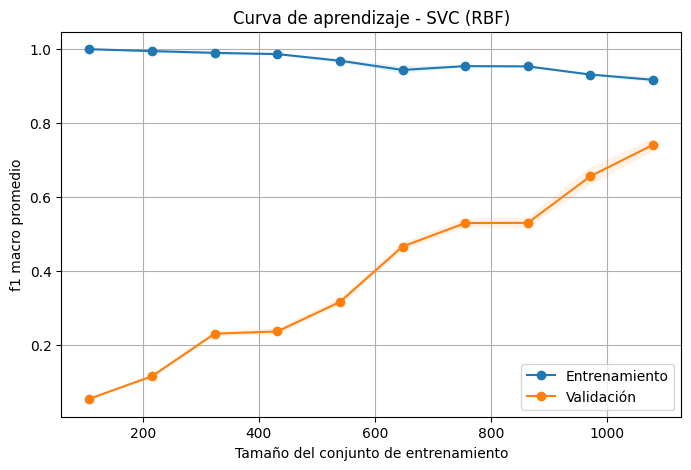

In [81]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Definir el modelo (usa el mismo que entrenaste)
est = SVC(kernel='poly', C=100, degree=3)

# Calcular la curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    est,
    X,
    y_encoded,
    cv=5,                   # validación cruzada de 5 pliegues
    scoring='f1_macro', # métrica (puedes cambiar por 'accuracy' o 'precision_macro')
    n_jobs=-1,              # usa todos los núcleos del procesador
    train_sizes=np.linspace(0.1, 1.0, 10), # desde 10% hasta 100% de los datos
    random_state=42
)

# Calcular promedios y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label="Entrenamiento")
plt.plot(train_sizes, val_mean, 'o-', label="Validación")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)

plt.title("Curva de aprendizaje - SVC (RBF)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("f1 macro promedio")
plt.legend()
plt.grid(True)
plt.show()
